In [2]:
# Importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [37]:
# Loading and reading the csv file

data = pd.read_csv(r"C:\Users\Shashi\Unsupervised Learning or Descriptive Model\Association Rules\book.csv")

In [4]:
# Checking the head of data which give top 5 row values

data.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [6]:
# Checking the data shape means how many rows and columns

data.shape

(2000, 11)

In [7]:
# 1st Business Moment : Measures of Central Tendency
# Checking Mean, Mode, Median of the data

data.mean()

ChildBks     0.4230
YouthBks     0.2475
CookBks      0.4310
DoItYBks     0.2820
RefBks       0.2145
ArtBks       0.2410
GeogBks      0.2760
ItalCook     0.1135
ItalAtlas    0.0370
ItalArt      0.0485
Florence     0.1085
dtype: float64

In [8]:
data.mode()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
data.median()

ChildBks     0.0
YouthBks     0.0
CookBks      0.0
DoItYBks     0.0
RefBks       0.0
ArtBks       0.0
GeogBks      0.0
ItalCook     0.0
ItalAtlas    0.0
ItalArt      0.0
Florence     0.0
dtype: float64

In [10]:
# 2nd Business Moment : Measures of Dispercation
# Checking the Variance & Standard Devation

data.var()

ChildBks     0.244193
YouthBks     0.186337
CookBks      0.245362
DoItYBks     0.202577
RefBks       0.168574
ArtBks       0.183011
GeogBks      0.199924
ItalCook     0.100668
ItalAtlas    0.035649
ItalArt      0.046171
Florence     0.096776
dtype: float64

In [11]:
data.std()

ChildBks     0.494159
YouthBks     0.431668
CookBks      0.495340
DoItYBks     0.450086
RefBks       0.410578
ArtBks       0.427797
GeogBks      0.447129
ItalCook     0.317282
ItalAtlas    0.188809
ItalArt      0.214874
Florence     0.311089
dtype: float64

In [12]:
# 3rd Business Moment : Measures of Skewness

data.skew()

ChildBks     0.311953
YouthBks     1.171053
CookBks      0.278875
DoItYBks     0.969674
RefBks       1.392116
ArtBks       1.212066
GeogBks      1.002952
ItalCook     2.438755
ItalAtlas    4.909338
ItalArt      4.206670
Florence     2.519487
dtype: float64

In [13]:
# 4th Business Moment : Measures of Kurtisos

data.kurt()

ChildBks     -1.904591
YouthBks     -0.629266
CookBks      -1.924154
DoItYBks     -1.060795
RefBks       -0.062077
ArtBks       -0.531428
GeogBks      -0.995084
ItalCook      3.951475
ItalAtlas    22.123718
ItalArt      15.711779
Florence      4.352166
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1d13c0d7250>,
 'caps': [<matplotlib.lines.Line2D at 0x1d13c0d77f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d13c0bff40>,
 'medians': [<matplotlib.lines.Line2D at 0x1d13c0d7d90>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d13c0e80a0>,
 'means': []}

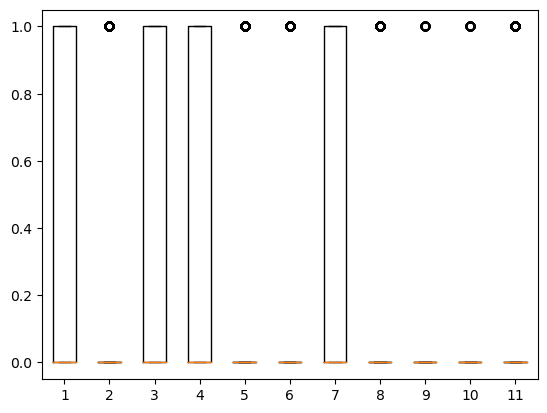

In [14]:
# Checking Outliers in data

plt.boxplot(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d13c86a790>,
 'caps': [<matplotlib.lines.Line2D at 0x1d13c86ad30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d13c86a4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d13c87a310>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d13c87a5e0>],
 'means': []}

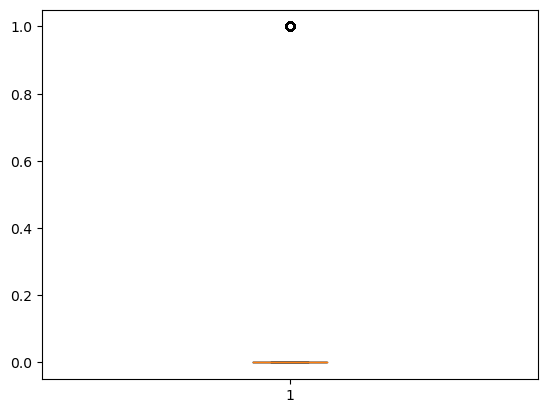

In [15]:
plt.boxplot(data['YouthBks'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d13c8ced30>,
 'caps': [<matplotlib.lines.Line2D at 0x1d13c8de310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d13c8cea30>],
 'medians': [<matplotlib.lines.Line2D at 0x1d13c8de8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d13c8deb80>],
 'means': []}

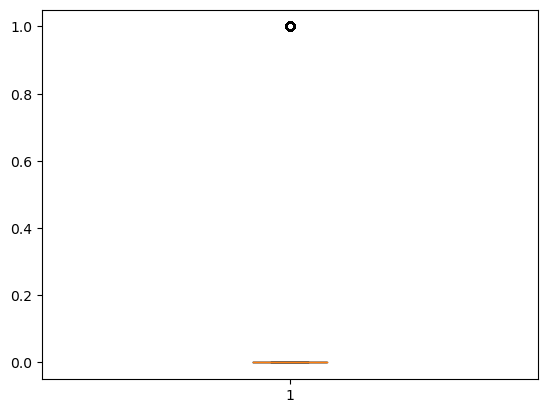

In [16]:
plt.boxplot(data['RefBks'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d13c934ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d13c943280>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d13c9349d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d13c943820>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d13c943af0>],
 'means': []}

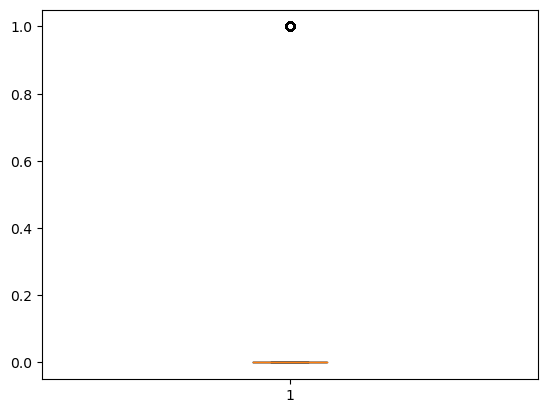

In [17]:
plt.boxplot(data['ArtBks'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d13ca63220>,
 'caps': [<matplotlib.lines.Line2D at 0x1d13ca637c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d13ca54f10>],
 'medians': [<matplotlib.lines.Line2D at 0x1d13ca63d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d13ca71070>],
 'means': []}

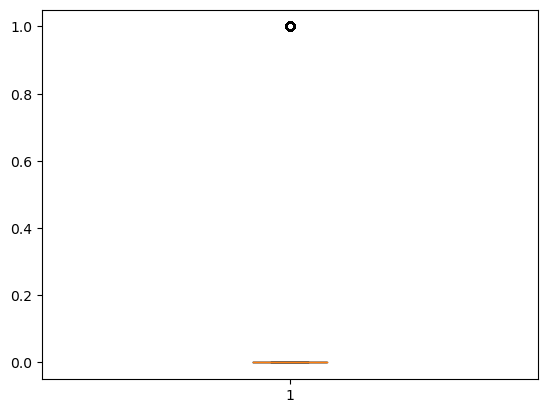

In [18]:
plt.boxplot(data['ItalCook'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d13cb28430>,
 'caps': [<matplotlib.lines.Line2D at 0x1d13cb289d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d13cb28160>],
 'medians': [<matplotlib.lines.Line2D at 0x1d13cb28fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d13cb362b0>],
 'means': []}

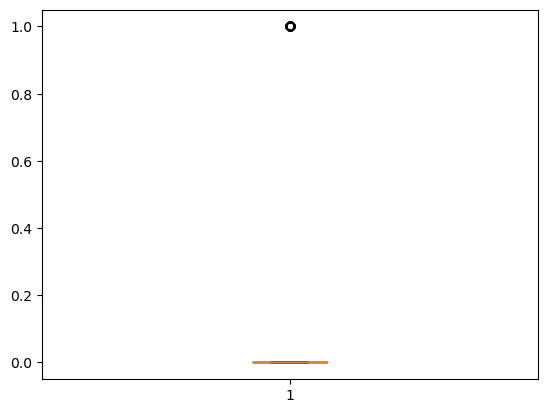

In [20]:
plt.boxplot(data['ItalArt'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d13cb8b6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d13cb8bc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d13cb8b3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d13db68250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d13db68520>],
 'means': []}

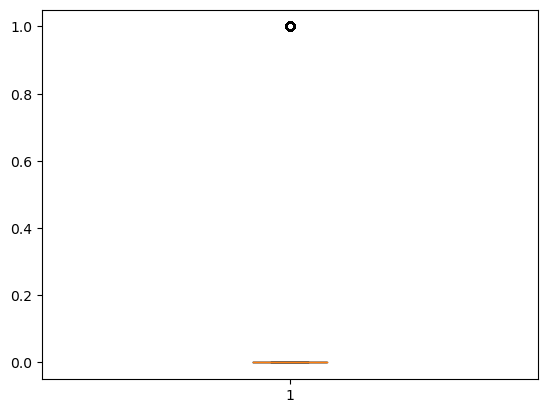

In [21]:
plt.boxplot(data['Florence'])

In [23]:
# To Clean The Outliers we use Winsorizer

from feature_engine.outliers import Winsorizer

C:\Users\Shashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YouthBks'>

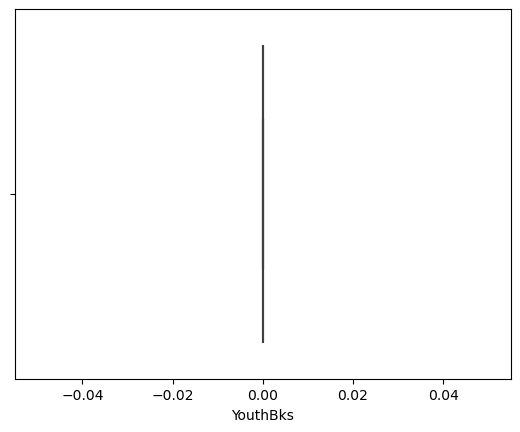

In [24]:
winsor_iqr = Winsorizer(capping_method = 'iqr',
                           tail = 'both',
                            fold = 1.5,
                             variables = ('YouthBks'))

data_iqr = winsor_iqr.fit_transform(data[['YouthBks']])

sns.boxplot(data_iqr['YouthBks'])

C:\Users\Shashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RefBks'>

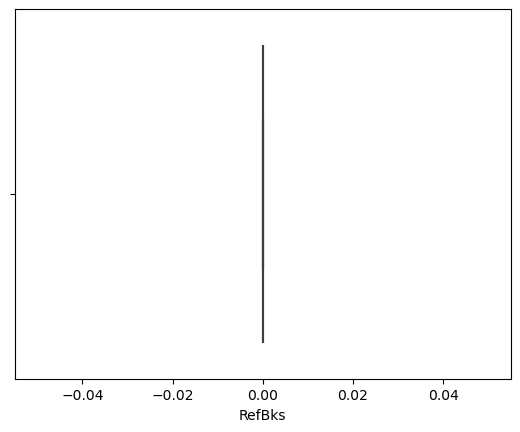

In [25]:
winsor_iqr = Winsorizer(capping_method = 'iqr',
                           tail = 'both',
                            fold = 1.5,
                             variables = ('RefBks'))

data_iqr = winsor_iqr.fit_transform(data[['RefBks']])

sns.boxplot(data_iqr['RefBks'])

C:\Users\Shashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ArtBks'>

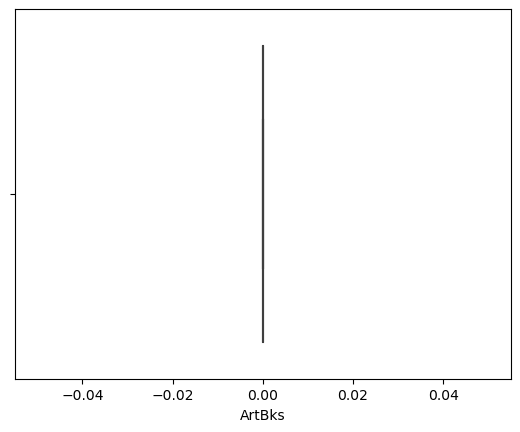

In [26]:
winsor_iqr = Winsorizer(capping_method = 'iqr',
                           tail = 'both',
                            fold = 1.5,
                             variables = ('ArtBks'))

data_iqr = winsor_iqr.fit_transform(data[['ArtBks']])

sns.boxplot(data_iqr['ArtBks'])

C:\Users\Shashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ItalCook'>

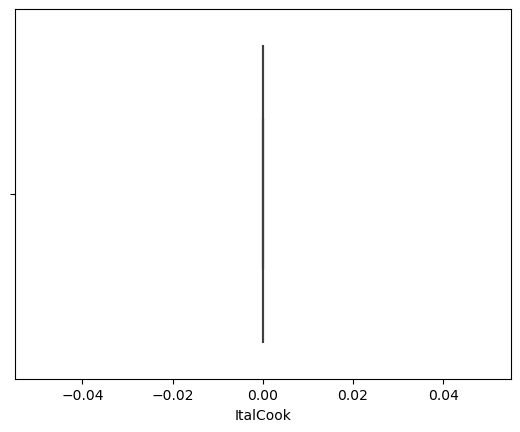

In [27]:
winsor_iqr = Winsorizer(capping_method = 'iqr',
                           tail = 'both',
                            fold = 1.5,
                             variables = ('ItalCook'))

data_iqr = winsor_iqr.fit_transform(data[['ItalCook']])

sns.boxplot(data_iqr['ItalCook'])

C:\Users\Shashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ItalArt'>

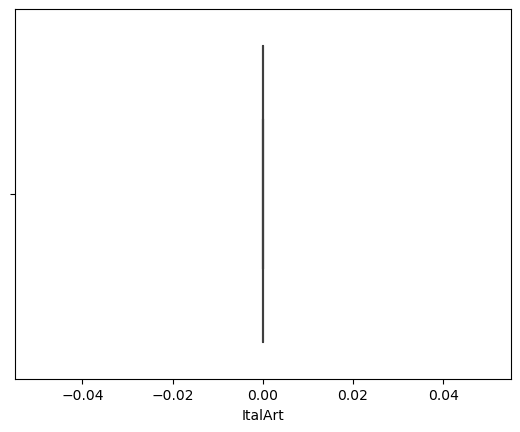

In [28]:
winsor_iqr = Winsorizer(capping_method = 'iqr',
                           tail = 'both',
                            fold = 1.5,
                             variables = ('ItalArt'))

data_iqr = winsor_iqr.fit_transform(data[['ItalArt']])

sns.boxplot(data_iqr['ItalArt'])

C:\Users\Shashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Florence'>

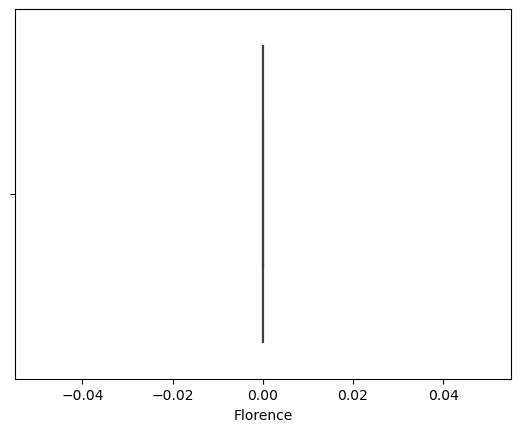

In [29]:
winsor_iqr = Winsorizer(capping_method = 'iqr',
                           tail = 'both',
                            fold = 1.5,
                             variables = ('Florence'))

data_iqr = winsor_iqr.fit_transform(data[['Florence']])

sns.boxplot(data_iqr['Florence'])

In [38]:
# Checking the duplicates in data

duplicates = data.duplicated()
sum(duplicates)

1680

In [39]:
duplicates = data.drop_duplicates(keep = 'last', inplace = True)

In [40]:
# After Cleaning the duplicates in data, Checking if any duplicates

duplicates = data.duplicated()
sum(duplicates)

0

In [41]:
# Checking variance in data

data.var() == 0

ChildBks     False
YouthBks     False
CookBks      False
DoItYBks     False
RefBks       False
ArtBks       False
GeogBks      False
ItalCook     False
ItalAtlas    False
ItalArt      False
Florence     False
dtype: bool

In [42]:
# Checking Missing values 

data.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [ ]:
# IN This dataset we have lot of 1 and 0 values for it, there is no transformation, where it show only two lines in graph

In [43]:
# Standardization - Normalizing the scale means min = 0, max = 1.

def norm_fun(i):
    x = (i - i.min())/(i.max() - i.mn())
    
    return x

In [44]:
data_norm = pd.DataFrame(data)

In [45]:
data_norm.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,0.612500,0.450000,0.681250,0.490625,0.506250,0.556250,0.521875,0.334375,0.159375,0.190625,0.318750
std,0.487942,0.498273,0.466722,0.500695,0.500744,0.497604,0.500304,0.472510,0.366599,0.393409,0.466722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
# Using Apriori Algorithm

frequent_items = apriori(data_norm, min_support = 0.0075, max_len = 4, use_colnames = True)
frequent_items

C:\Users\Shashi\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.612500,(ChildBks)
1,0.450000,(YouthBks)
2,0.681250,(CookBks)
3,0.490625,(DoItYBks)
4,0.506250,(RefBks)
...,...,...
555,0.028125,"(ItalCook, GeogBks, ItalArt, ItalAtlas)"
556,0.018750,"(Florence, ItalCook, GeogBks, ItalAtlas)"
557,0.034375,"(Florence, ItalCook, GeogBks, ItalArt)"
558,0.015625,"(Florence, GeogBks, ItalArt, ItalAtlas)"


In [47]:
frequent_items.sort_values('support', ascending = True, inplace = True)
frequent_items

,support,itemsets
559,0.009375,"(Florence, ItalCook, ItalArt, ItalAtlas)"
514,0.009375,"(Florence, ArtBks, DoItYBks, ItalAtlas)"
522,0.009375,"(Florence, ItalCook, DoItYBks, ItalAtlas)"
398,0.009375,"(YouthBks, Florence, DoItYBks, ItalAtlas)"
552,0.009375,"(Florence, ItalCook, ArtBks, ItalAtlas)"
...,...,...
4,0.506250,(RefBks)
6,0.521875,(GeogBks)
5,0.556250,(ArtBks)
0,0.612500,(ChildBks)


In [50]:
# Association Rules

rules = association_rules(frequent_items, metric = 'lift', min_threshold = 1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Florence, ItalCook, ItalArt)",(ItalAtlas),0.043750,0.159375,0.009375,0.214286,1.344538,0.002402,1.069886
1,"(Florence, ItalCook, ItalAtlas)",(ItalArt),0.021875,0.190625,0.009375,0.428571,2.248244,0.005205,1.416406
2,"(Florence, ItalArt, ItalAtlas)",(ItalCook),0.021875,0.334375,0.009375,0.428571,1.281709,0.002061,1.164844
3,"(Florence, ItalCook)","(ItalArt, ItalAtlas)",0.093750,0.068750,0.009375,0.100000,1.454545,0.002930,1.034722
4,"(Florence, ItalArt)","(ItalCook, ItalAtlas)",0.062500,0.087500,0.009375,0.150000,1.714286,0.003906,1.073529
...,...,...,...,...,...,...,...,...,...
4675,(ChildBks),(ArtBks),0.612500,0.556250,0.365625,0.596939,1.073148,0.024922,1.100949
4676,(ArtBks),(CookBks),0.556250,0.681250,0.384375,0.691011,1.014328,0.005430,1.031591
4677,(CookBks),(ArtBks),0.681250,0.556250,0.384375,0.564220,1.014328,0.005430,1.018289
4678,(ChildBks),(CookBks),0.612500,0.681250,0.437500,0.714286,1.048493,0.020234,1.115625


In [51]:
rules.sort_values('lift' , ascending = False,).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2914,"(ArtBks, ItalAtlas)","(RefBks, ItalArt)",0.078125,0.090625,0.068750,0.880000,9.710345,0.061670,7.578125
2915,"(RefBks, ItalArt)","(ArtBks, ItalAtlas)",0.090625,0.078125,0.068750,0.758621,9.710345,0.061670,3.819196
451,"(Florence, ItalAtlas)","(RefBks, ItalArt)",0.037500,0.090625,0.021875,0.583333,6.436782,0.018477,2.182500
452,"(RefBks, ItalArt)","(Florence, ItalAtlas)",0.090625,0.037500,0.021875,0.241379,6.436782,0.018477,1.268750
1680,"(GeogBks, ItalAtlas)","(RefBks, ItalArt)",0.081250,0.090625,0.043750,0.538462,5.941645,0.036387,1.970312
